In [62]:
pip install scipy

In [29]:
import numpy as np
from scipy.optimize import minimize

def eval_2nd_degree(coeffs, x):
    return coeffs[0]*x[0]**2 + coeffs[1]*x[1]**2 + coeffs[2]*x[0]*x[1] + coeffs[3]*x[0] + coeffs[4]*x[1] + coeffs[5]

def objective_function(coeffs, data_points):
    return sum([eval_2nd_degree(coeffs, x)**2 for x in data_points])

def constraint(coeffs):
    return np.sum((coeffs)**2) - 1


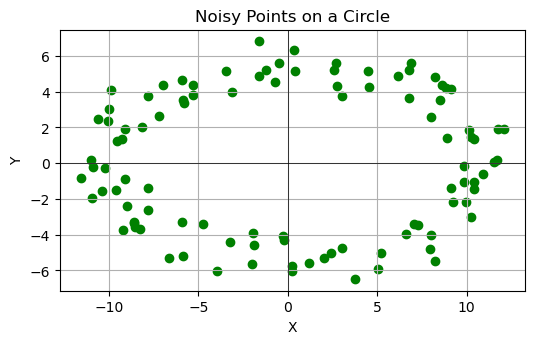

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Adding noise to the original circular data
np.random.seed(0)  # For reproducibility
noise_level = 1 # Adjust the noise level as needed

angle = np.linspace(0, 2 * np.pi, 100)
radius = 5
x = radius * 2*np.cos(angle)
y = radius * np.sin(angle)
x_y_pairs = np.column_stack((x, y))

# Add random noise to x and y
x_noisy = x + np.random.normal(0, noise_level, x.shape)
y_noisy = y + np.random.normal(0, noise_level, y.shape)
x_y_pairs_noisy = np.column_stack((x_noisy, y_noisy))

# Plotting the noisy data
plt.figure(figsize=(6, 6))
plt.scatter(x_y_pairs_noisy[:, 0], x_y_pairs_noisy[:, 1], color='green')
plt.title('Noisy Points on a Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()




In [43]:
cons = ({'type': 'eq', 'fun': constraint})

initial_guess = np.random.uniform(-2, 2, 6)

result = minimize(objective_function, initial_guess, args=(x_y_pairs,), constraints=cons,method='SLSQP')
best_fit_coeffs = result.x
print("Best fit coefficients:", best_fit_coeffs)


Best fit coefficients: [ 9.99181619e-03  3.99661970e-02  1.44961965e-07  9.20257960e-07
  3.43021339e-06 -9.99151073e-01]
